<a href="https://colab.research.google.com/github/anagha1112/House_Price_Analysis/blob/main/InsuranceCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Analysis on  Medical Insurance Charges Dataset.


1. Clean the data, handle missing entries
2. Run EDA and identify the attributes that most affect the charges
3. Develop single variable and multi variable Linear Regression models for predicting the charges.
4. Use Ridge regression to refine the performance of Linear regression models.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [ ]:
download(filepath, "insurance.csv")
file_name="insurance.csv"

In [ ]:
#Importing the dataset as pandas data frame
df = pd.read_csv(file_name, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [ ]:
#Adding headers
headers= ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns=headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [ ]:
#replacing ? values with nan
df.replace('?',np.nan,inplace=True)

In [ ]:
#DATA WRANGLING

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


age and smoker have some null values


In [ ]:
#handling missing values

df['age'].fillna(df['age'].astype('float').mean(axis=0),inplace=True)
df['smoker'].fillna(df['smoker'].value_counts().idxmax(),inplace=True)
df[['age','smoker']] = df[['age','smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [ ]:
df[['charges']] = np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


(0.0, 66902.85800000001)

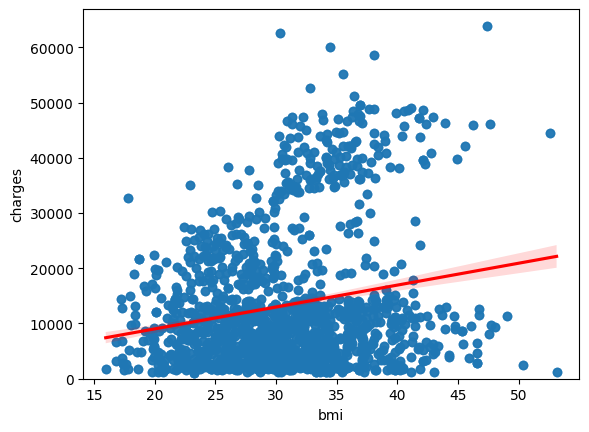

In [ ]:
#Performing EDA

#1. regplot for charges and bmi
sns.regplot(x='bmi',y='charges',data=df,line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

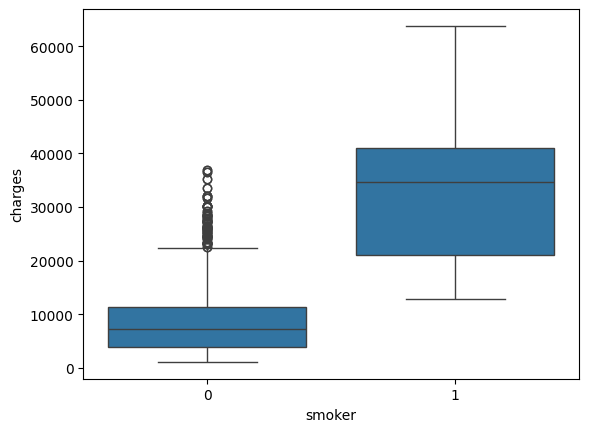

In [ ]:
#boxplot between charges and smoker

sns.boxplot(x='smoker',y='charges',data = df)

In [ ]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [ ]:
#Model Development - Linear Regression model to predict charges wrt smoker feature only

x = df[['smoker']]
y =df['charges']
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)


0.6221791733924185

In [ ]:
#Fit a model using all attributes

mlr = LinearRegression()
xm = df[['age','gender','bmi','no_of_children','smoker','region']]
ym = df['charges']

mlr.fit(xm,ym)
mlr.score(xm,ym)

0.7504083820289634

In [ ]:
#training pipeline

Input=[('scale',StandardScaler()),('poly',PolynomialFeatures()),('model',LinearRegression())]
pipe = Pipeline(Input)
xm = xm.astype(float)
pipe.fit(xm,y)


ypipe = pipe.predict(xm)

r2_score(y,ypipe)

0.8452576213500093

In [ ]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(xm,y,test_size=0.20,random_state=0)

In [ ]:
rr = Ridge(alpha=0.1)
rr.fit(x_train,y_train)
yhat = rr.predict(x_test)
rr.score(x_test,y_test)

0.7469894680059708

In [ ]:
#apply polynomial transformation of degree 2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.8410037679926452